# # Task 3 Stock Market Prediction And Forecasting Using Stacked LSTM 

# Name - Vinay Balkrishna Bhalerao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
...,...,...,...,...,...,...,...,...
2095,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2096,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2097,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2098,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [5]:
dff=df.reset_index()['Close']
dff

0       213.80
1       210.05
2       214.60
3       219.10
4       219.40
         ...  
2095    118.65
2096    117.60
2097    120.65
2098    120.90
2099    121.55
Name: Close, Length: 2100, dtype: float64

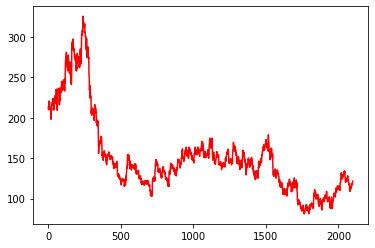

In [6]:
import matplotlib.pyplot as plt
plt.plot(dff,color='red')

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
print(dff)

[[0.54268791]
 [0.52736928]
 [0.54595588]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [9]:
training_size=int(len(dff)*0.65)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]
training_size,test_size

(1365, 735)

In [10]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
64/64 [==============================] - 11s 115ms/step - loss: 0.0109 - val_loss: 0.0010
Epoch 2/100
64/64 [==============================] - 6s 98ms/step - loss: 0.0021 - val_loss: 8.3950e-04
Epoch 3/100
64/64 [==============================] - 6s 94ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/100
64/64 [==============================] - 6s 93ms/step - loss: 0.0015 - val_loss: 8.7001e-04
Epoch 5/100
64/64 [==============================] - 6s 94ms/step - loss: 0.0017 - val_loss: 8.6816e-04
Epoch 6/100
64/64 [==============================] - 6s 94ms/step - loss: 0.0013 - val_loss: 6.3628e-04
Epoch 7/100
64/64 [==============================] - 6s 93ms/step - loss: 0.0011 - val_loss: 7.5602e-04
Epoch 8/100
64/64 [==============================] - 6s 93ms/step - loss: 0.0011 - val_loss: 6.9428e-04
Epoch 9/100
64/64 [==============================] - 6s 93ms/step - loss: 0.0011 - val_loss: 5.9152e-04
Epoch 10/100
64/64 [==============================] - 6s 94ms/step - l

In [16]:
tr_predict=model.predict(X_train)
te_predict=model.predict(X_test)

In [17]:
tr_predict=scaler.inverse_transform(tr_predict)
te_predict=scaler.inverse_transform(te_predict)
math.sqrt(mean_squared_error(y_train,tr_predict))

0.01443050220480896

In [18]:
math.sqrt(mean_squared_error(ytest,te_predict))

0.01308848782055047

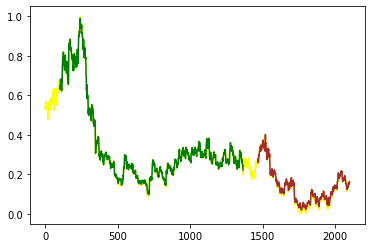

In [19]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(dff)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(tr_predict)+look_back, :] = tr_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dff)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(tr_predict)+(look_back*2)+1:len(dff)-1, :] = te_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dff),color="yellow")
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='brown')
plt.show()

In [20]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 394)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.16278594771241828,
 0.1654411764705882,
 0.15522875816993464,
 0.17197712418300648,
 0.15032679738562088,
 0.1325571895424837,
 0.14338235294117646,
 0.15849673202614378,
 0.11866830065359474,
 0.11519607843137253,
 0.10947712418300654,
 0.06924019607843135,
 0.06597222222222215,
 0.05841503267973852,
 0.050449346405228745,
 0.04534313725490191,
 0.04779411764705882,
 0.0529003267973856,
 0.04922385620915032,
 0.06638071895424835,
 0.0716911764705882,
 0.053921568627450955,
 0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238

In [23]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=393
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.16544118 0.15522876 0.17197712 0.1503268  0.13255719 0.14338235
 0.15849673 0.1186683  0.11519608 0.10947712 0.0692402  0.06597222
 0.05841503 0.05044935 0.04534314 0.04779412 0.05290033 0.04922386
 0.06638072 0.07169118 0.05392157 0.04881536 0.04881536 0.05310458
 0.04963235 0.05065359 0.05126634 0.04963235 0.05902778 0.05555556
 0.04084967 0.03737745 0.03737745 0.02655229 0.02879902 0.0316585
 0.0316585  0.03635621 0.02205882 0.01674837 0.01450163 0.02226307
 0.03615196 0.02675654 0.03206699 0.02696078 0.03574346 0.03594771
 0.04044118 0.03921569 0.04411765 0.02982026 0.0122549  0.01286765
 0.01143791 0.00245098 0.0059232  0.         0.00714869 0.00428922
 0.0067402  0.0063317  0.01123366 0.01960784 0.02757353 0.03002451
 0.03349673 0.04003268 0.04084967 0.03982843 0.04166667 0.04370915
 0.04758987 0.03594771 0.02839052 0.02410131 0.01715686 0.01531863
 0.01756536 0.02696078 0.02696078 0.03819444 0.02839052 0.02369281
 0.02920752 0.02328431 0.01919935 0.00653595 0.0006

In [24]:
n=np.arange(1,101)
pred=np.arange(101,131)
dff.shape

(2100, 1)

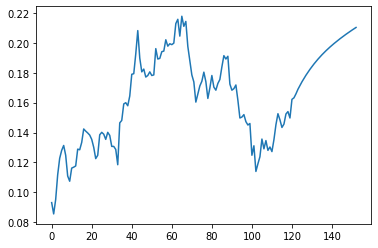

In [26]:
dff=dff.tolist()
dff.extend(lst_output)
plt.plot(dff[1977:])

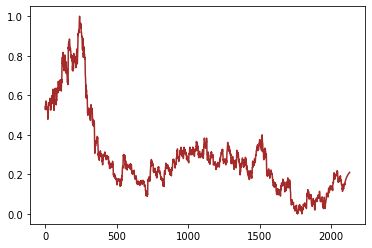

In [27]:
dff=scaler.inverse_transform(dff).tolist()
plt.plot(dff,color='brown')